Load Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Extracting the File from ZipFile 

In [2]:
from zipfile import ZipFile
file_name= "archive.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


Load and prepare data

In [3]:
#collecting Data
import os

path = os.listdir(r'/content/Training')

In [4]:
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [5]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

 Data Analysis

In [6]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [7]:
np.unique(Y)

array([0, 1])

In [8]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [9]:
X.shape, X_updated.shape

((1222, 200, 200), (1222, 40000))

Data Visualization

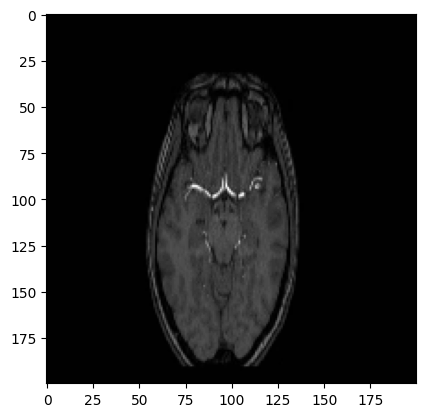

In [10]:
plt.imshow(X[0], cmap='gray')

Split Data

In [11]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [13]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

Feature Scaling

In [14]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [15]:
from sklearn.decomposition import PCA

In [16]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


 Model Training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [18]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [25]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

In [19]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [28]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [32]:
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

In [29]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

 Evaluation

In [ ]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9714285714285714


In [26]:
print("Training Score:", dtc.score(xtrain, ytrain))
print("Testing Score:", dtc.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9673469387755103


In [22]:
print("Training Score:", rfc.score(xtrain, ytrain))
print("Testing Score:", rfc.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.9755102040816327


In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9928352098259979
Testing Score: 0.9673469387755103


Prediction

In [ ]:
pred = sv.predict(xtest)

In [ ]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  4,  50,  79, 121, 153, 171, 232, 241]),)

In [ ]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  8
1 1


In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

TESTING (On test dataset)

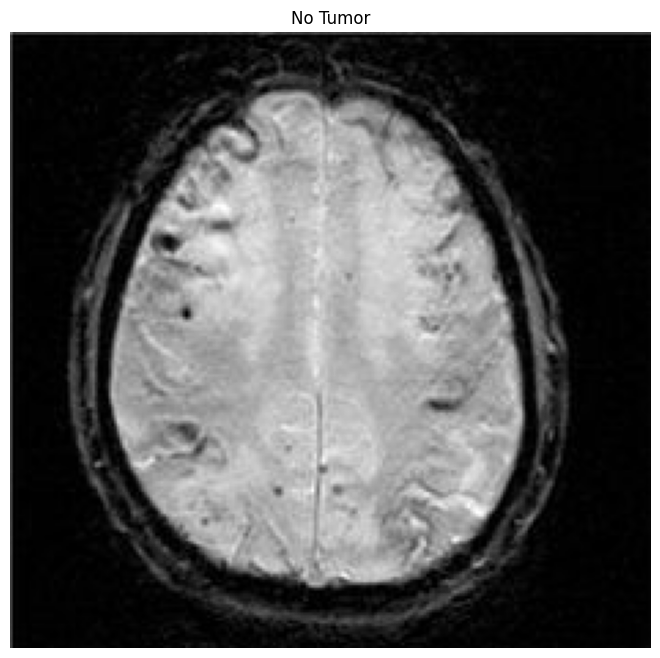

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/Testing/')
c=1
for i in os.listdir('/content/Testing/no_tumor/')[:1]:
    plt.subplot(1,1,c)
    
    img = cv2.imread('/content/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

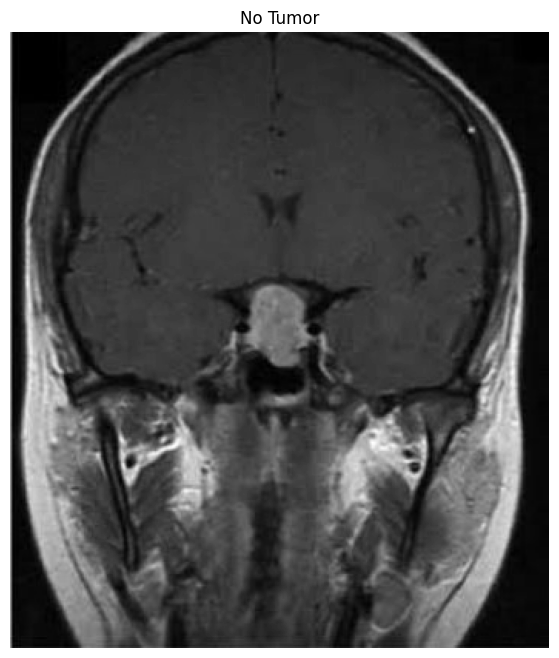

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/Testing/')
c=1
for i in os.listdir('/content/Testing/pituitary_tumor/')[:1]:
    plt.subplot(1,1,c)
    
    img = cv2.imread('/content/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1